### Setup code

In [4]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/CSC310/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder
    print("Success!")

except ModuleNotFoundError:
    print("Error")
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Error


# 1. Import data set

<p>
Import Tennis data set from GitHub
</p>

In [16]:
import pandas as pd
url = "https://raw.githubusercontent.com/IndraniMandal/CSC310-S20/master/notes/assets/tennis_numeric.csv"
td = pd.read_csv(url)
td

,outlook_sunny,outlook_overcast,outlook_rainy,temperature,humidity,windy,play
0,1,0,0,85,85,0,no
1,1,0,0,80,90,1,no
2,0,1,0,83,86,0,yes
3,0,0,1,70,96,0,yes
4,0,0,1,68,80,0,yes
5,0,0,1,65,70,1,no
6,0,1,0,64,65,1,yes
7,1,0,0,72,95,0,no
8,1,0,0,69,70,0,yes
9,0,0,1,75,80,0,yes


## 2. Build a decision tree and print it using treeviz

In [20]:
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score

features_td = td.drop(['play'],axis=1)
features_td.head()


,outlook_sunny,outlook_overcast,outlook_rainy,temperature,humidity,windy
0,1,0,0,85,85,0
1,1,0,0,80,90,1
2,0,1,0,83,86,0
3,0,0,1,70,96,0
4,0,0,1,68,80,0


In [25]:
target_td = pd.DataFrame(td['play'])
target_td.head()

,play
0,no
1,no
2,yes
3,yes
4,yes


In [26]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [27]:
dtree.fit(features_td,target_td)

DecisionTreeClassifier(criterion='entropy')

In [28]:
tree_print(dtree,features_td)

if outlook_overcast =< 0.5: 
  |then if humidity =< 82.5: 
  |  |then if temperature =< 66.5: 
  |  |  |then no
  |  |  |else yes
  |  |else if humidity =< 95.5: 
  |  |  |then no
  |  |  |else yes
  |else yes
<------->
Tree Depth:  3


In [29]:
target_td['play'].unique()

array(['no', 'yes'], dtype=object)

[Text(0.625, 0.875, 'outlook_overcast <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = yes'),
 Text(0.5, 0.625, 'humidity <= 82.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = no'),
 Text(0.5625, 0.75, 'True  '),
 Text(0.25, 0.375, 'temperature <= 66.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = yes'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(0.75, 0.375, 'humidity <= 95.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = no'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = no'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = yes'),
 Text(0.6875, 0.75, '  False')]

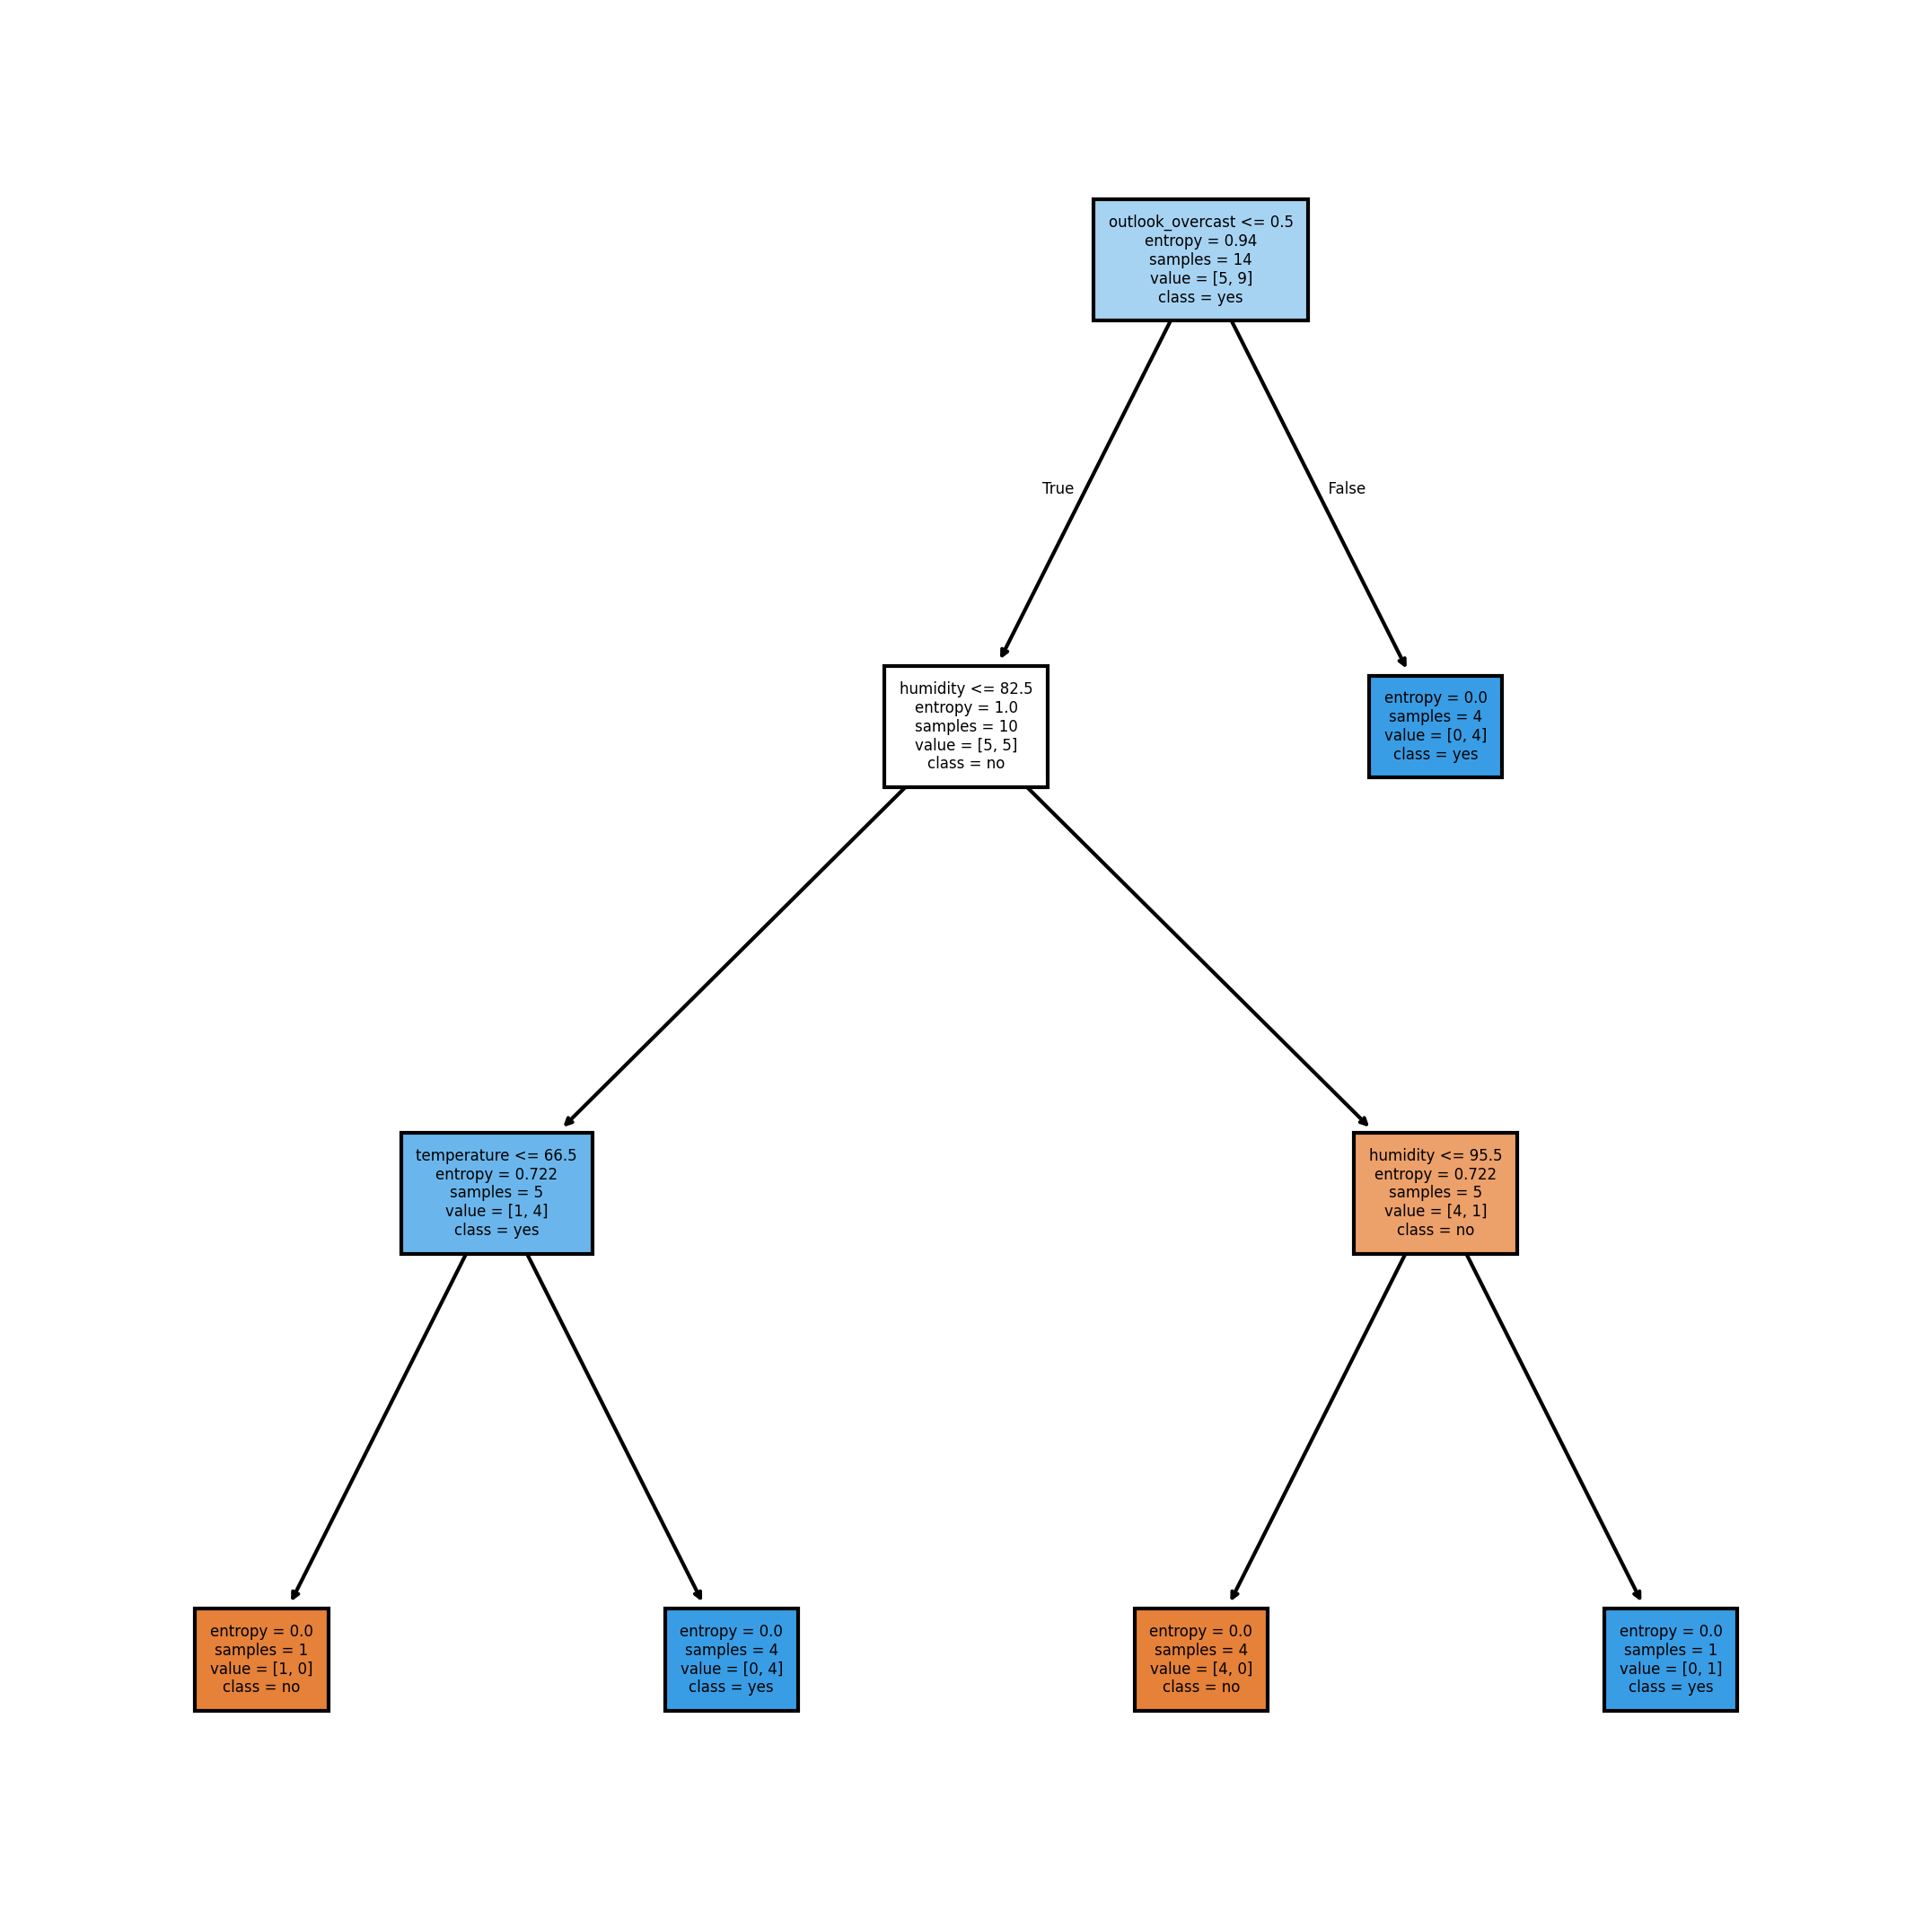

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize= 4, filled=True,
          feature_names= features_td.columns,
          class_names= list(target_td['play'].unique()))

<p>
Check the accuracy of the model
</p>

In [36]:
predict_array = dtree.predict(features_td)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['play']
predicted_labels.head()

,play
0,no
1,no
2,yes
3,yes
4,yes


In [37]:
target_td.head()

,play
0,no
1,no
2,yes
3,yes
4,yes


In [38]:
predicted_labels.equals(target_td)

True

## 3. Questions about model
<p>
<ul>
<li>Our model is 100% correct
<li>Yes I can relate the patterns back to the data. If we look at the 3rd line of our data set (2), and follow our decision tree, we see that our data has an overcast outlook, 83 temp, and 86 humidity. Following our decision tree, we immediately see that an overcast outlook results in a "yes" to playing tennis
</ul>
</p>

# Part 2

    ## 1. Data set import - Caesarian

<p>
This data set takes in a person's data and determines if they needed to have a C-Section
</p>

In [61]:
import pandas as pd
url = "https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/caesarian.csv"
cd = pd.read_csv(url)
cd

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,False
1,26,2,0,1,0,True
2,26,2,1,1,0,False
3,28,1,0,2,0,False
4,22,2,0,1,0,True
...,...,...,...,...,...,...
73,32,3,0,1,1,False
74,38,3,2,2,1,True
75,27,2,1,1,0,False
76,33,4,0,1,0,True


## 2. Build a decision tree and print it using treeviz

In [63]:
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

features_cd = cd.drop(['Caesarian'], axis=1)
features_cd.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem
0,22,1,0,2,0
1,26,2,0,1,0
2,26,2,1,1,0
3,28,1,0,2,0
4,22,2,0,1,0


In [67]:
target_cd = pd.DataFrame(cd['Caesarian'])
target_cd.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [68]:
dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [69]:
dtree.fit(features_cd, target_cd)

DecisionTreeClassifier(criterion='entropy')

In [70]:
tree_print(dtree, features_cd)

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Age =< 17.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then if Age =< 27.5: 
  |  |  |  |  |  |  |then if Delivery time =< 0.5: 
  |  |  |  |  |  |  |  |then if Age =< 26.5: 
  |  |  |  |  |  |  |  |  |then if Age =< 23.5: 
  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then True
  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |else if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |then if Age =< 25.5: 
  |  |  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |  |  |else if Delivery nu

In [71]:
target_cd['Caesarian'].unique()

array([False,  True])

[Text(0.5054347826086957, 0.9166666666666666, 'Heart Problem <= 0.5\nentropy = 0.983\nsamples = 78\nvalue = [33.0, 45.0]\nclass = True'),
 Text(0.2717391304347826, 0.75, 'Age <= 21.5\nentropy = 0.989\nsamples = 48\nvalue = [27, 21]\nclass = False'),
 Text(0.38858695652173914, 0.8333333333333333, 'True  '),
 Text(0.13043478260869565, 0.5833333333333334, 'Age <= 18.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]\nclass = True'),
 Text(0.08695652173913043, 0.4166666666666667, 'Age <= 17.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = False'),
 Text(0.043478260869565216, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = True'),
 Text(0.13043478260869565, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = False'),
 Text(0.17391304347826086, 0.4166666666666667, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = True'),
 Text(0.41304347826086957, 0.5833333333333334, 'Delivery number <= 2.5\nentropy = 0.959\nsamples = 42\nvalue = [26, 16]\nclass = False'),
 Text(0.3043

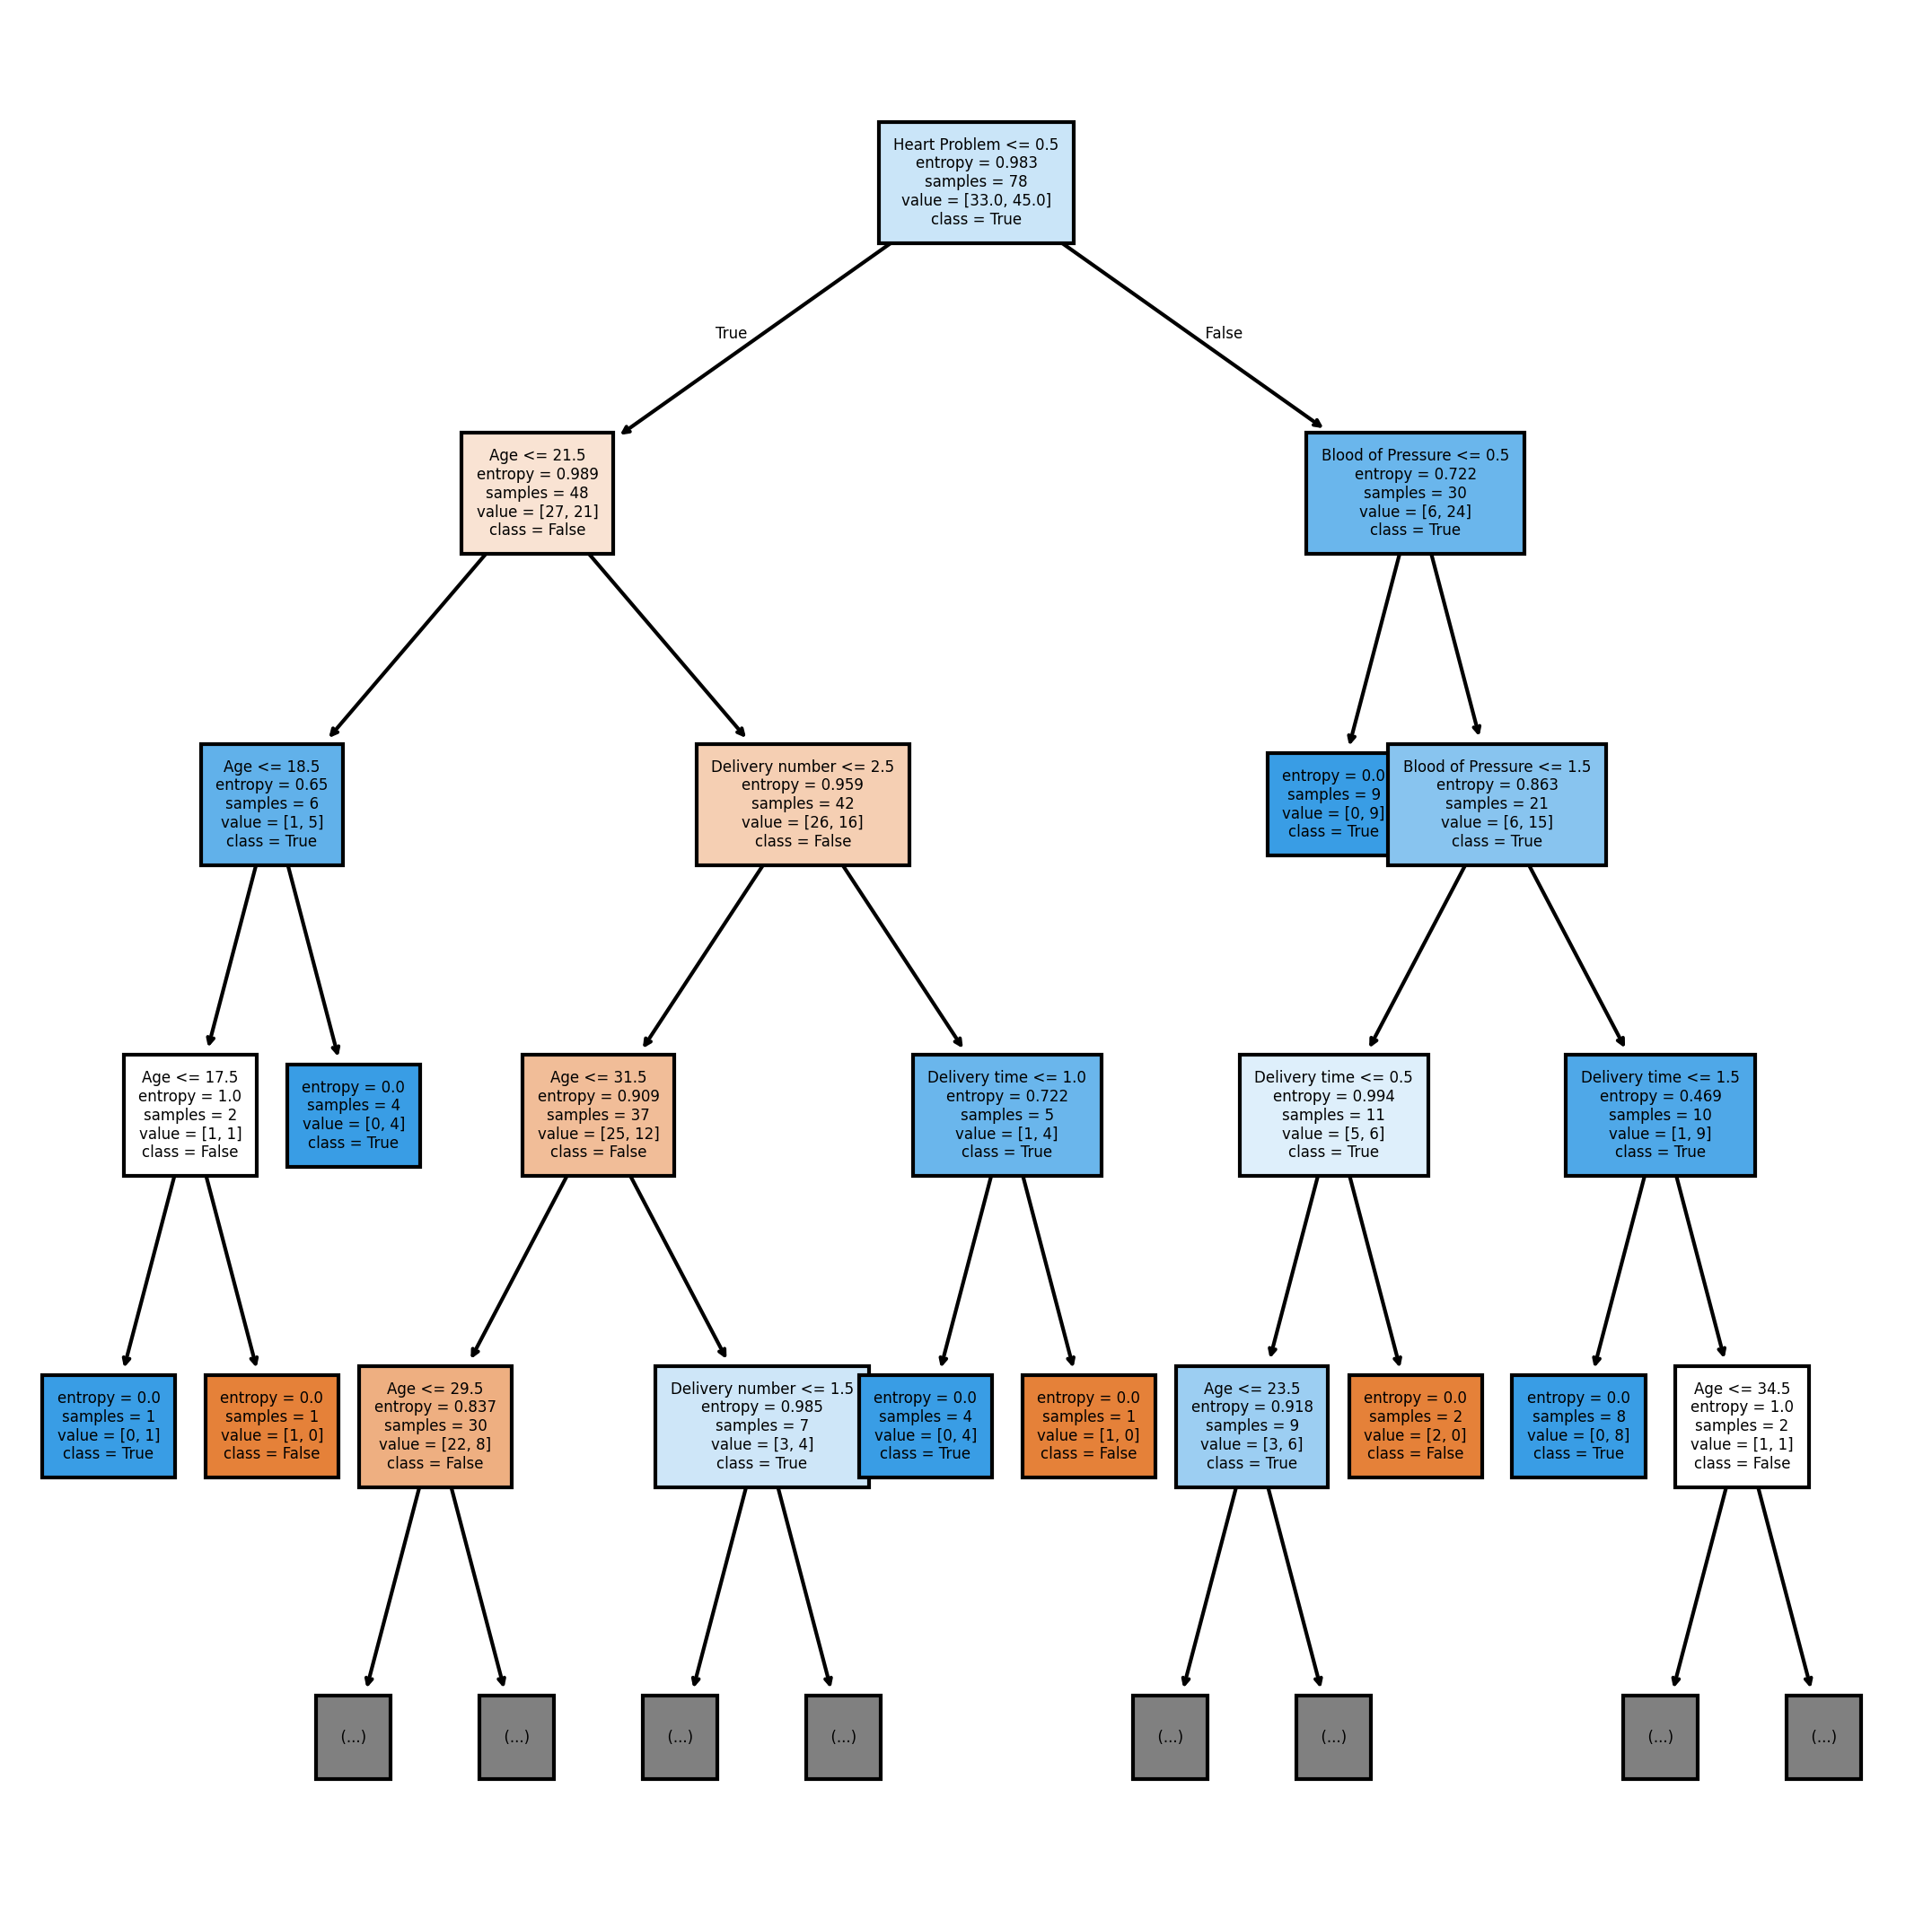

In [76]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
class_names = target_cd['Caesarian'].unique().astype(str)
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(dtree, fontsize=4, filled=True,
          max_depth=4,
          feature_names=features_cd.columns,
          class_names=class_names)

<p>
Check the accuracy of the model
</p>

In [77]:
predict_array = dtree.predict(features_cd)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['Caesarian']
predicted_labels.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [78]:
target_cd.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [79]:
predicted_labels.equals(target_cd)

False

## 3. Questions about model
<p>
<ul>
<li>Our model is not 100% correct
<li>Yes I can relate the patterns back to the data. If we look at the 4th line, we see age is 22, delivery number is 2, delivery time is 0, blood pressure is 1, and heart problem is 0. If we follow our decision tree, As there is no heart problem, and blood pressure is greater than 0.5 but less than 1.5, and delivery time is greater than 0.5 and age is less than 23, we would decide to perform a C-Section
</ul>
</p>